<a href="https://colab.research.google.com/github/junhansong/deeplearning/blob/master/deeplearning/run_project/22_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 호출


In [1]:
!git clone https://github.com/junhansong/deeplearning.git

Cloning into 'deeplearning'...
remote: Enumerating objects: 597, done.
remote: Counting objects: 100% (597/597), done.
remote: Compressing objects: 100% (582/582), done.
remote: Total 597 (delta 152), reused 328 (delta 13), pack-reused 0
Receiving objects: 100% (597/597), 4.95 MiB | 8.87 MiB/s, done.
Resolving deltas: 100% (152/152), done.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics



### 같은 결과 출력


In [0]:
np.random.seed(3)
tf.random.set_seed(3)



### 데이터 어그멘테이션


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  horizontal_flip=True,     #수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,  #전체 크기의 10% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1, #마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,
                                  #shear_range=0.7,
                                  #zoom_range=[0.9, 2.2],
                                  #vertical_flip=True,
                                  fill_mode='nearest') 

train_generator = train_datagen.flow_from_directory(
       './deeplearning/deeplearning/run_project/train',   #학습셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')



Found 160 images belonging to 2 classes.


### 테스트 셋은 이미지 부풀리기 과정을 진행하지 않습니다.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
       './deeplearning/deeplearning/run_project/test',   #테스트셋이 있는 폴더의 위치입니다.
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')




Found 120 images belonging to 2 classes.


### 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))



### 모델을 컴파일 합니다. 


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])



### 모델을 실행합니다


In [8]:
history = model.fit_generator(
       train_generator,
       steps_per_epoch=100,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
 32/100 [========>.....................] - 1s 34ms/step - loss: 0.7002 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.5000


### 결과를 그래프로 표현하는 부분입니다.


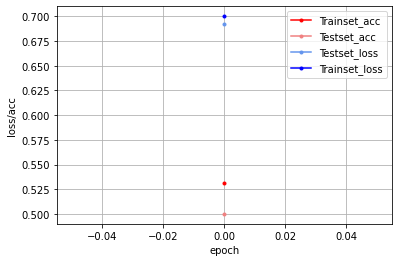

In [9]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()
